## Importing libraries

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Load Data

In [2]:
df = pd.read_csv(r"/content/SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 13)

## Summary of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Statistical summary of data

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Checking for duplicates and missing values

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Droping Unnecessary Columns

In [11]:
df=df.drop('Postal Code',axis=1)

In [12]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

In [13]:
#Clearly the data is for US country only, so we can drop the 'Country' column as we don't need any analysis to be done based on it
df=df.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
df.dtypes

Ship Mode        object
Segment          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

## unique values in the columns


In [14]:
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['State'].unique())
print(df['Region'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
['South' 'West' 'Central' 'East']


In [16]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [17]:
df.shape

(9977, 11)

## Correlation among the columns

In [18]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


## Covariance between set of variables

In [20]:
df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


# Summary of Data

In [22]:
df.value_counts()

Ship Mode       Segment      City           State         Region  Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     Los Angeles    California    West    Office Supplies  Paper         19.440   3         0.0        9.3312      3
First Class     Consumer     Los Angeles    California    West    Office Supplies  Binders       36.624   3         0.2        13.7340     2
                Corporate    San Diego      California    West    Office Supplies  Labels        18.900   3         0.0        8.6940      2
Standard Class  Corporate    New York City  New York      East    Furniture        Furnishings   10.020   3         0.0        4.4088      2
                Consumer     Philadelphia   Pennsylvania  East    Office Supplies  Paper         20.736   4         0.2        7.2576      2
                                                                                                                                          ..
Second Class    Co

<Axes: >

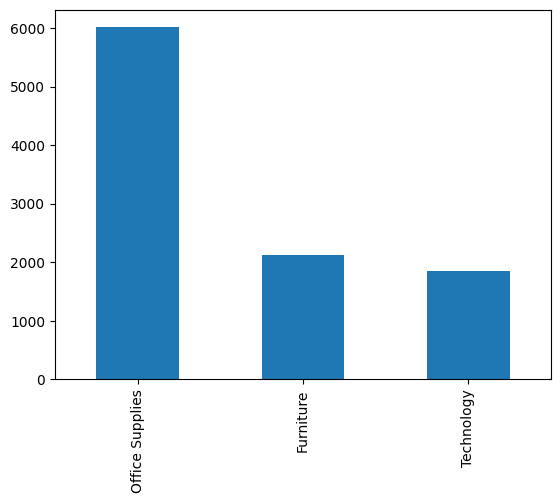

In [21]:
df['Category'].value_counts().plot(kind='bar')

<Axes: >

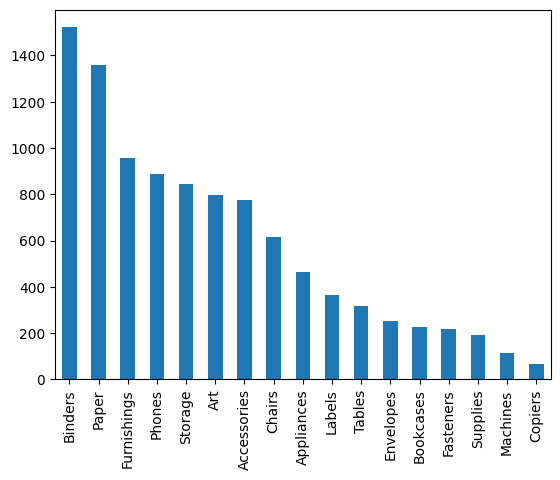

In [23]:
df['Sub-Category'].value_counts().plot(kind='bar')

## 1.Countplot

<Axes: xlabel='Ship Mode', ylabel='count'>

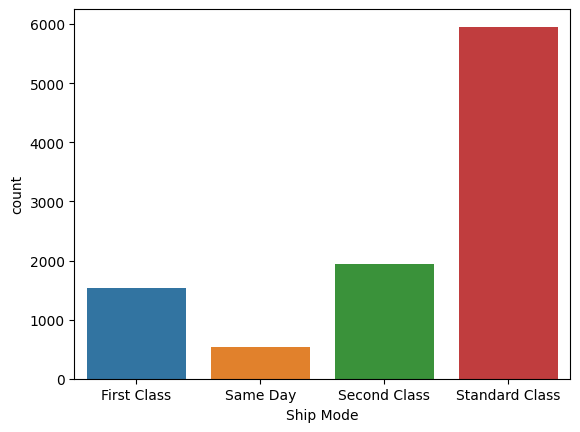

In [24]:
df['Ship Mode']=df['Ship Mode'].astype('category')
sns.countplot(x='Ship Mode', data =df)

<Axes: xlabel='Segment', ylabel='count'>

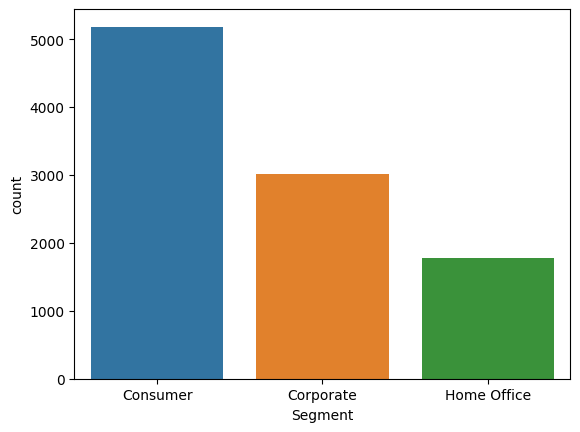

In [25]:
df['Segment']=df['Segment'].astype('category')
sns.countplot(x='Segment', data =df)

<Axes: xlabel='Region', ylabel='count'>

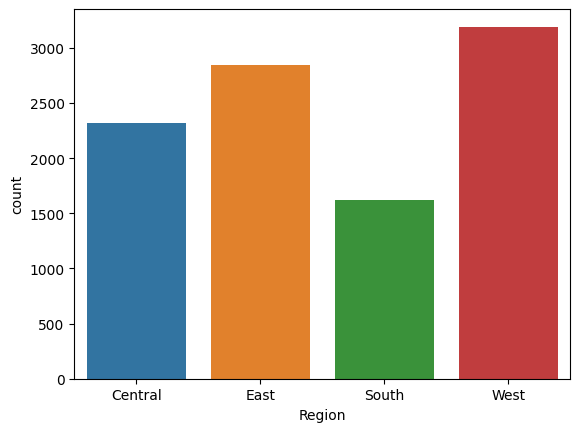

In [26]:
df['Region']=df['Region'].astype('category')
sns.countplot(x='Region', data =df)

## 2.Piechart

<Axes: ylabel='Ship Mode'>

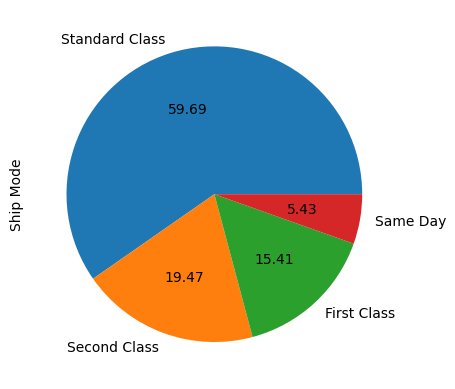

In [27]:
df['Ship Mode'].value_counts().plot(kind='pie',autopct='%.2f')

## 3.Histogram

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 4.000e+00,
        1.400e+01, 1.200e+01, 6.600e+01, 1.827e+03, 7.788e+03, 1.580e+02,
        5.100e+01, 1.300e+01, 1.300e+01, 2.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-6.59997800e+03, -6.29997892e+03, -5.99997984e+03, -5.69998076e+03,
        -5.39998168e+03, -5.09998260e+03, -4.79998352e+03, -4.49998444e+03,
        -4.19998536e+03, -3.89998628e+03, -3.59998720e+03, -3.29998812e+03,
        -2.99998904e+03, -2.69998996e+03, -2.39999088e+03, -2.09999180e+03,
        -1.79999272e+03, -1.49999364e+03, -1.19999456e+03, -8.99995480e+

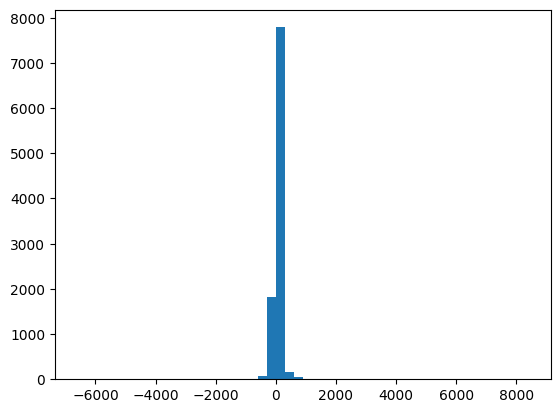

In [28]:
plt.hist(df['Profit'],bins=50)

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

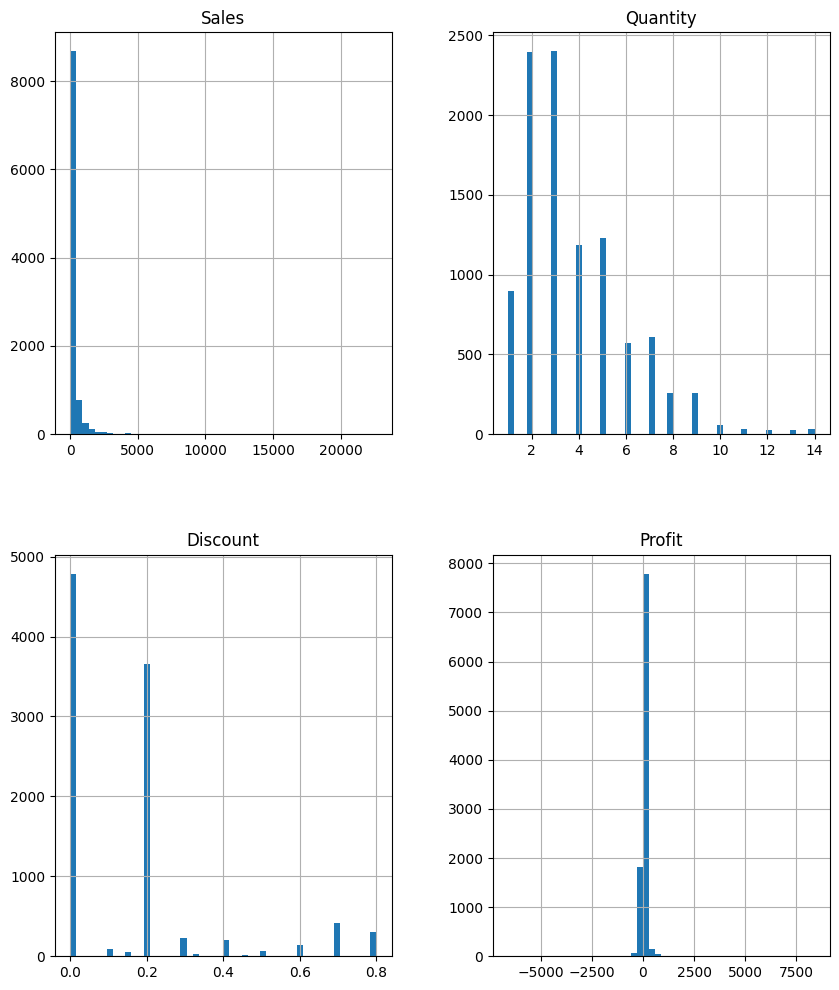

In [29]:
df.hist(bins=50,figsize=(10,12))

## 4.Distplot

<Axes: xlabel='Quantity', ylabel='Density'>

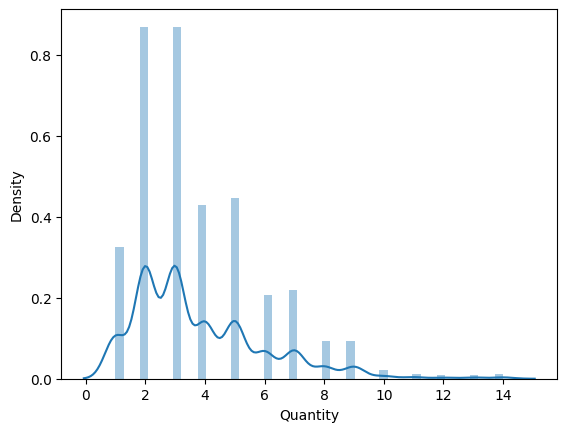

In [30]:
sns.distplot(df['Quantity'])

## 5. Scatter Plot

<Axes: xlabel='Quantity', ylabel='Profit'>

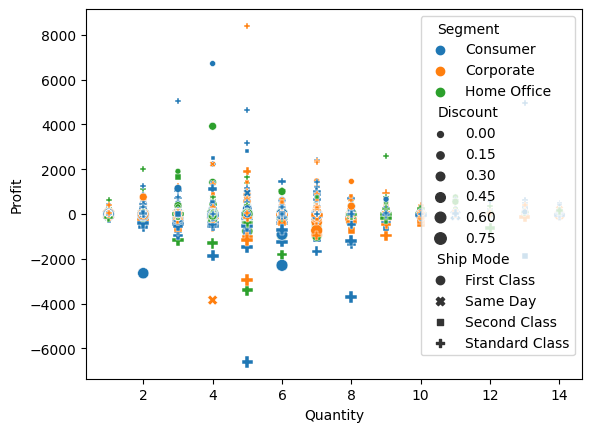

In [31]:
sns.scatterplot(x='Quantity',y='Profit',hue='Segment',style='Ship Mode',size='Discount',data=df)

## 6.Bar Plot

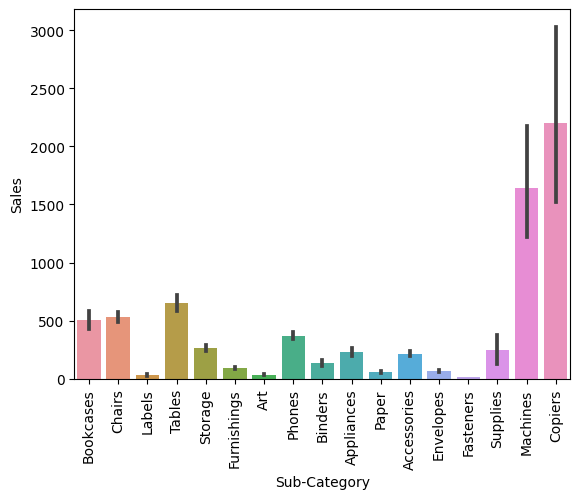

In [32]:
sns.barplot(x=df['Sub-Category'],y=df['Sales'])
plt.xticks(rotation='vertical')
plt.show()

## Sub-category

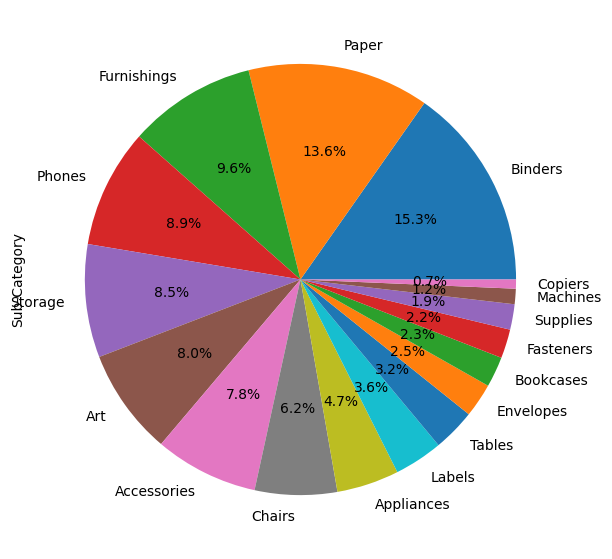

In [33]:
plt.figure(figsize=(12,7))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

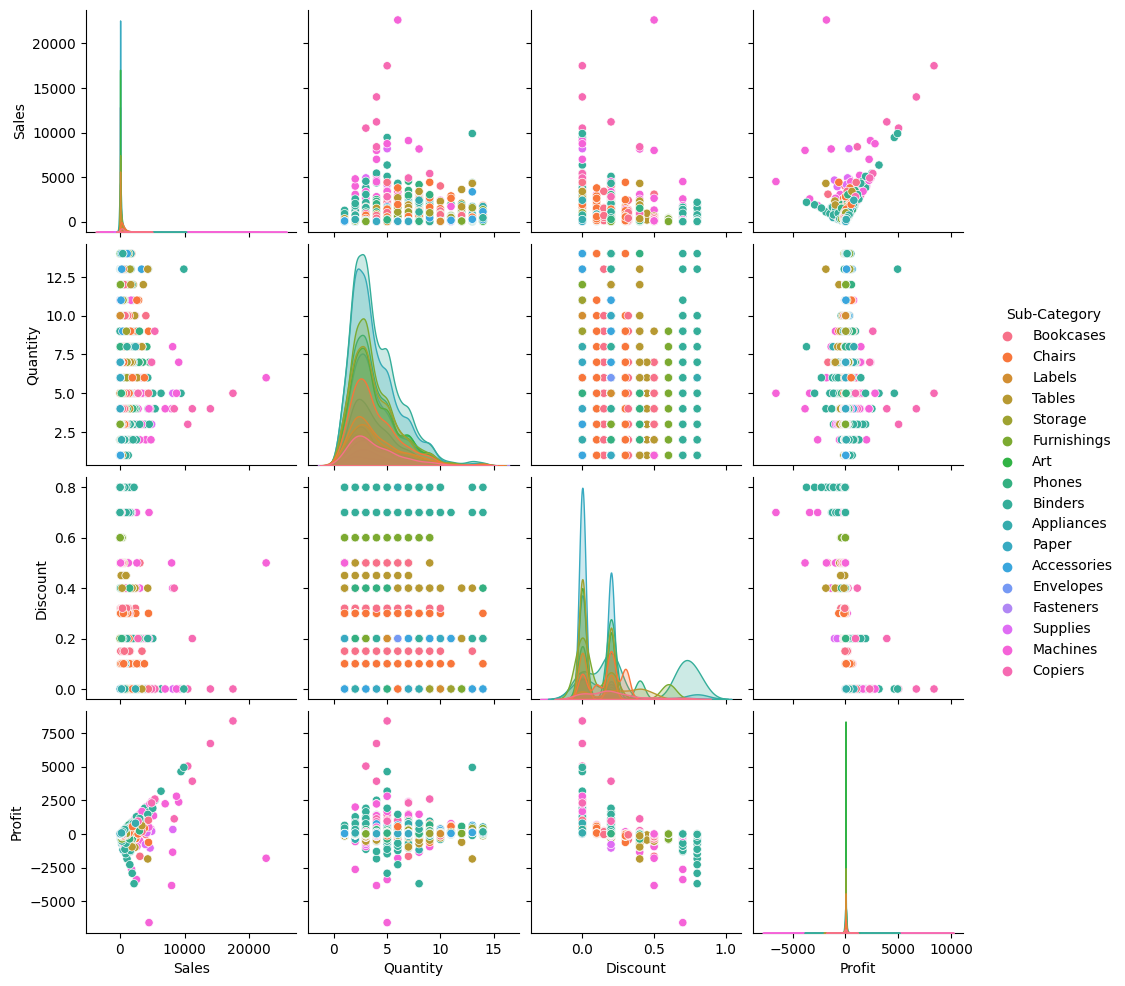

In [51]:
figsize=(12,8)
sns.pairplot(df,hue='Sub-Category')

## Total Profit & Sales per Sub-category

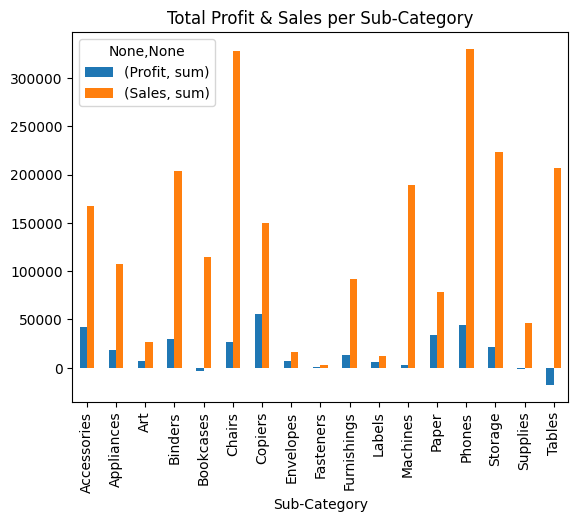

In [36]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title ("Total Profit & Sales per Sub-Category")
plt.rcParams['figure.figsize']=[10,9]
plt.show()


## Sales and Profit Region Wise


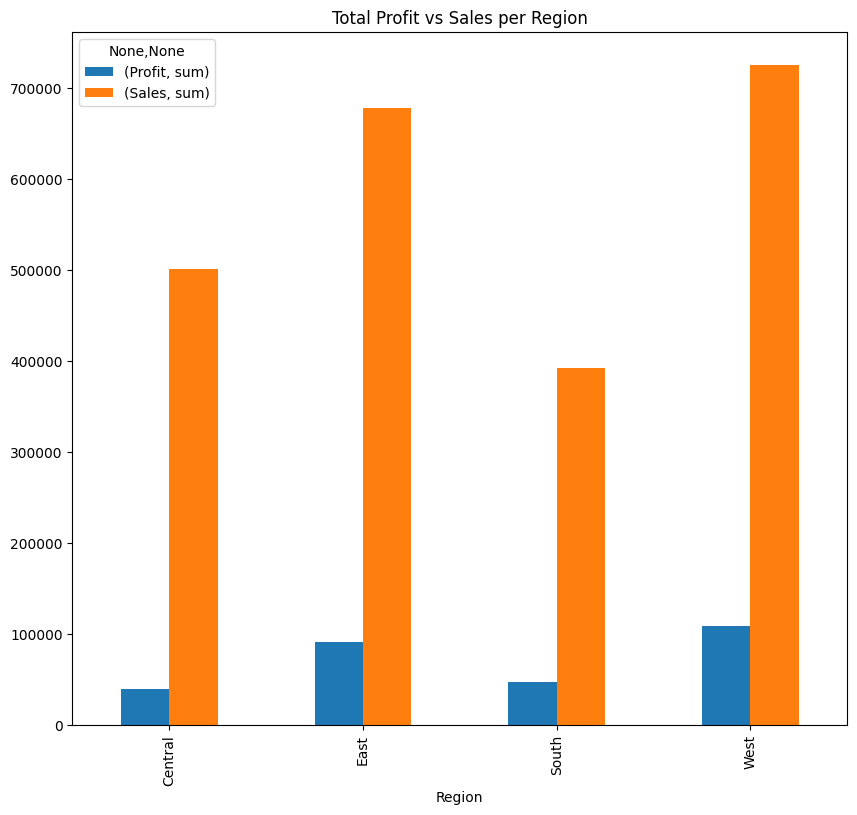

In [37]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit vs Sales per Region')
plt.rcParams['figure.figsize'] = [5,7]
plt.show()


## Profit & Sales based on States

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

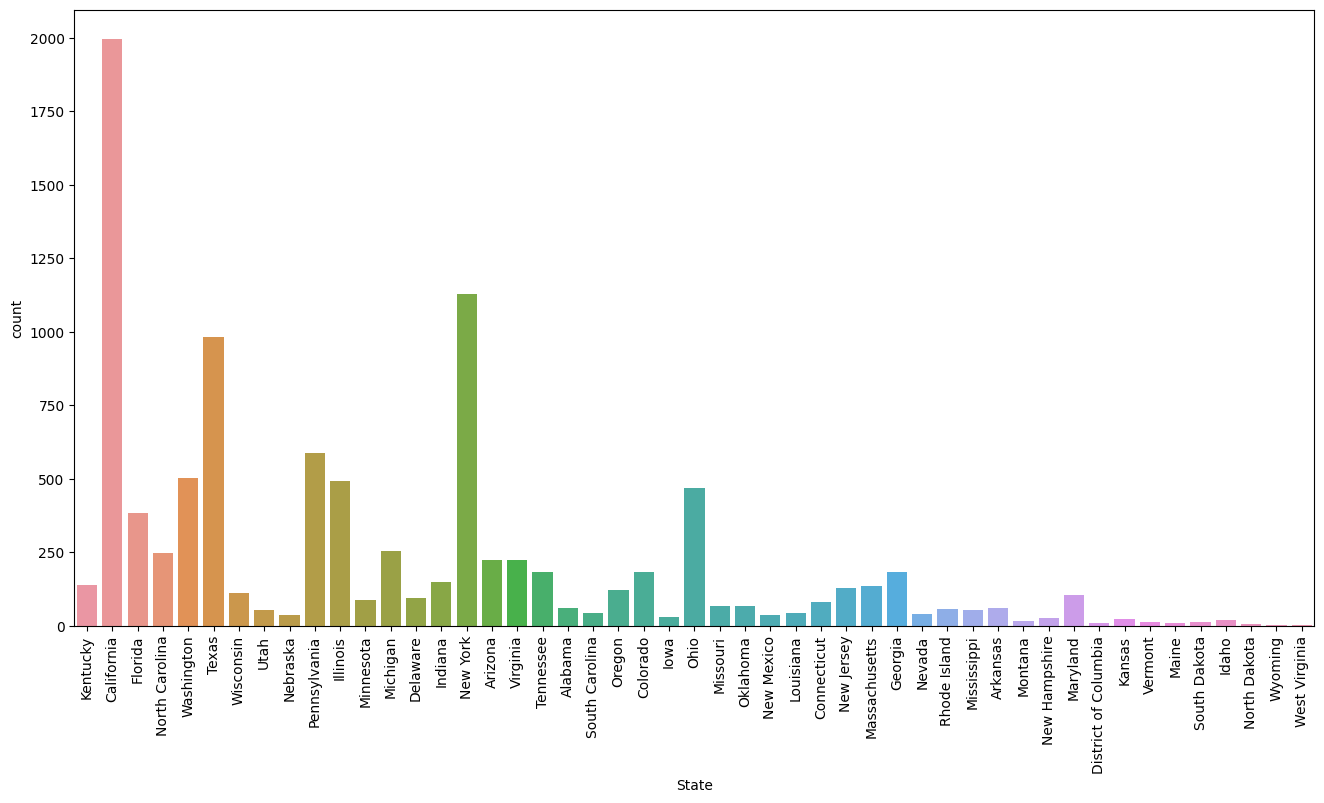

In [39]:
print(df['State'].value_counts())
plt.figure(figsize=(16,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='State'>

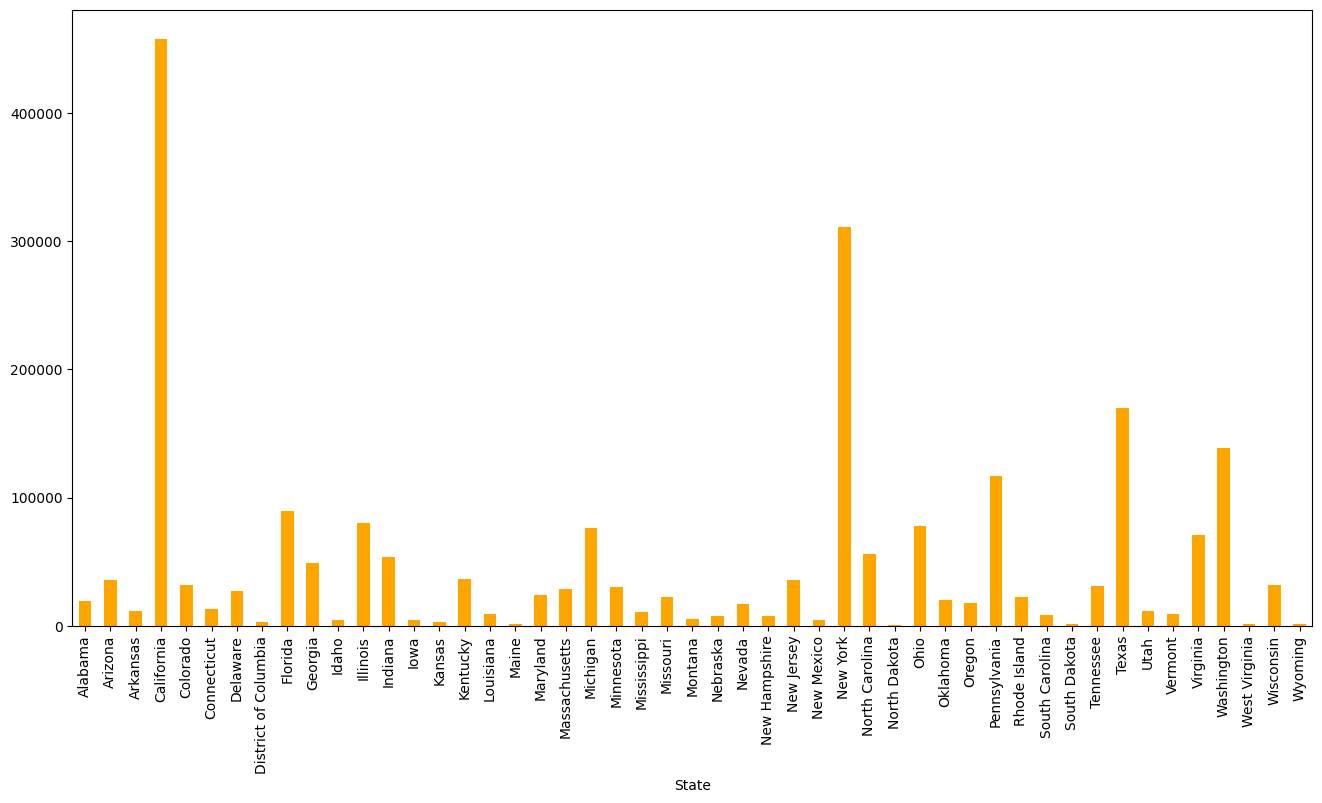

In [40]:
df.groupby('State')['Sales'].sum().plot.bar(color='orange',figsize=(16,8))

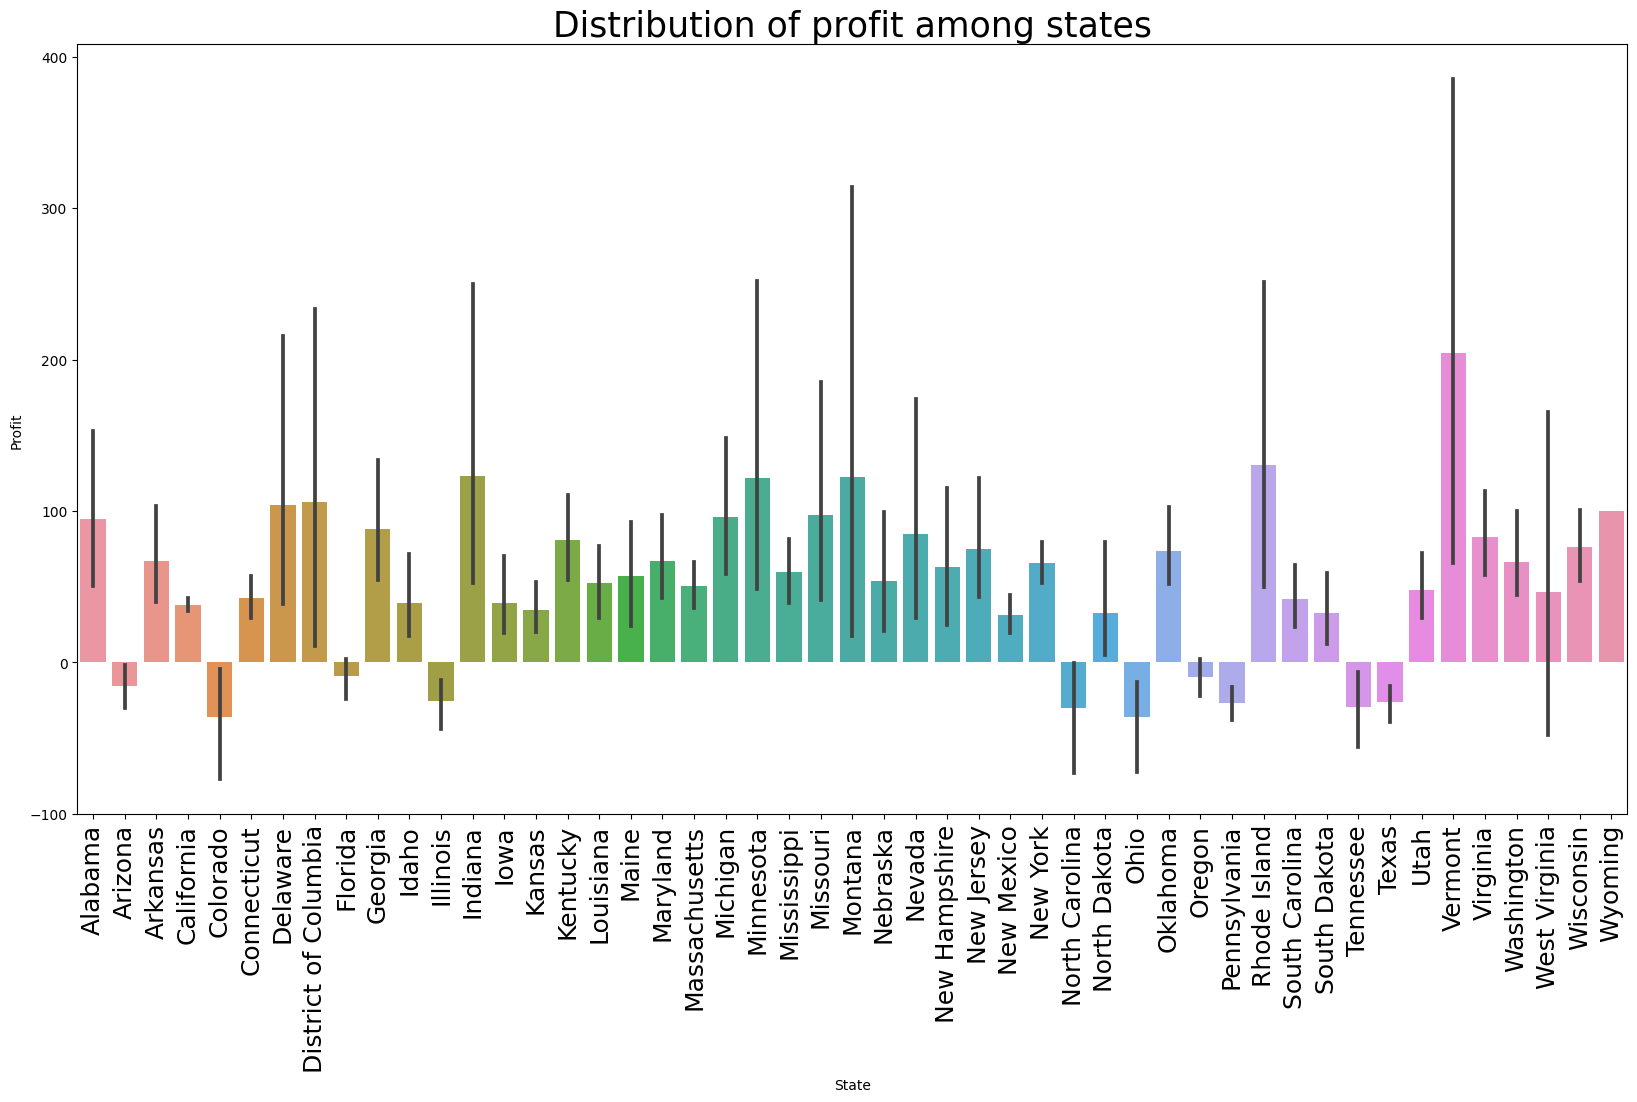

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['State'].sort_values(ascending=True),y=df['Profit'])
plt.title('Distribution of profit among states',fontsize=25)
plt.xticks(rotation=90,fontsize=18)
plt.xlabel('State',fontsize=10)
plt.ylabel('Profit',fontsize=10)
plt.show()

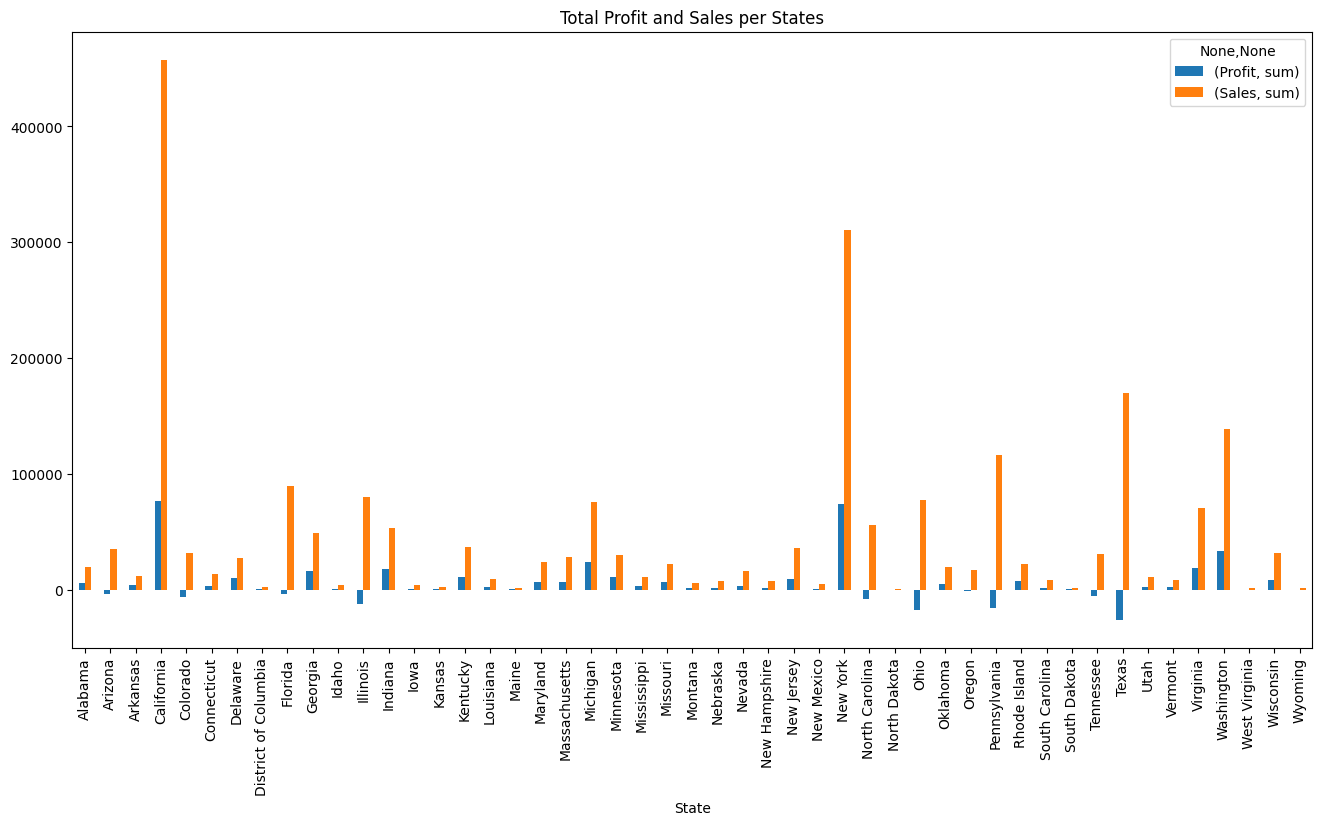

In [41]:
df.groupby('State')[['Profit','Sales']].agg(['sum']).plot.bar(figsize=(16,8))
plt.title('Total Profit and Sales per States')
plt.show()

## Discount vs Profit

<function matplotlib.pyplot.legend(*args, **kwargs)>

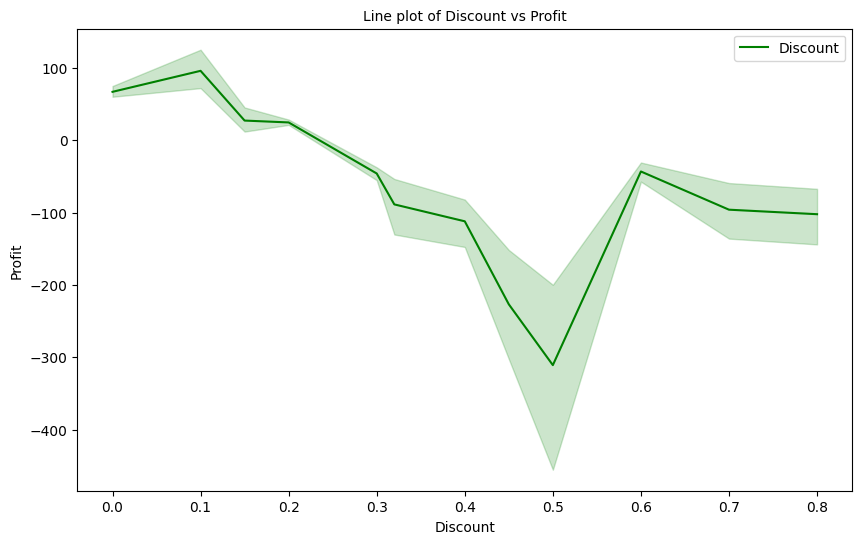

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Discount',y='Profit',data=df,color='g',label="Discount")
plt.title('Line plot of Discount vs Profit',fontsize=10)
plt.legend

## Box plot of Sales, Quantity, Discount & Profit

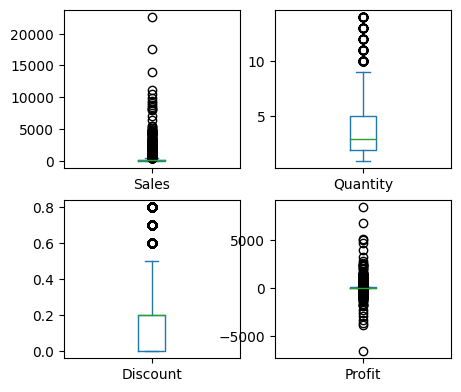

In [43]:
df.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = [20,18]
plt.show()


## Profit state ,city & sub-category wise

In [48]:
import plotly.express as px
fig = px.bar(df, x='State', color='Profit', title='Profit Count')
fig.show()


In [49]:
import plotly.express as px
fig = px.bar(df, x='City', color='Profit', title='Profit Count')
fig.show()


In [50]:
fig = px.scatter(df, x='Sub-Category', y='Profit', color='Profit', title='Sub-Category Vs. Profit')
fig.show()

## CONCLUSION



1.   The analysis of the dataset reveals that the Southern region has generated the highest profits compared to other regions, while the Central region has shown relatively lower profits
2.   copiers have consistently been the most profitable product category. On the other hand, while chairs and phones have relatively high selling prices, their profits might not be as impressive.
3.   Technology category has the highest count of products compared to other categories.
4.   West region has the highest number of transactions compared to other regions.
5.   There is a negative correlation between the discount offered on products and the resulting profit. This means that providing higher discounts might lead to reduced profitability.


